## Torch tensor intro

In [1]:
import torch  # <Ctrl> / <Shift> + <Return>

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cpu')

## Some Shortcuts for Jupyter Notebook

In [6]:
torch.sq  # <Tab>

<function _VariableFunctions.squeeze>

In [7]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [8]:
torch.nn.Module() # <Shift>+<Tab>

Module()

In [9]:
# Annotate your functions / classes!
torch.nn.Module?

In [12]:
torch.nn.Module?? # get source code for given object

## Bash Scripts in Jupyter Notebook

In [ ]:
# List all the files in the current directory
!ls -lh

In [ ]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

In [15]:
# Getting some general help
%magic

# Torch 

In [16]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [19]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [22]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [23]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [24]:
t

tensor([[[-1.7774e-24,  8.8562e-43,  8.9683e-44,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.0561e-38,  8.2186e+20,  1.3371e+22]],

        [[ 2.5965e+20,  1.7156e-07,  3.2915e-09,  4.4153e-05],
         [ 4.1546e+21,  3.4181e-06,  2.1513e+23,  4.2015e-05],
         [ 8.3388e-10,  2.5786e-09,  2.5964e+20,  6.8320e-07]]])

In [25]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[0., 0., 6., 4.],
         [5., 7., 9., 1.],
         [1., 4., 4., 4.]],

        [[4., 7., 6., 7.],
         [7., 0., 0., 3.],
         [1., 3., 5., 4.]]])

In [28]:
t

tensor([[[0., 0., 6., 4.],
         [5., 7., 9., 1.],
         [1., 4., 4., 4.]],

        [[4., 7., 6., 7.],
         [7., 0., 0., 3.],
         [1., 3., 5., 4.]]])

In [29]:
r = torch.Tensor(t)

In [31]:
r.size()

torch.Size([2, 3, 4])

In [32]:
# This resizes the tensor permanently 
r.resize_(3, 8)
r

tensor([[0., 0., 6., 4., 5., 7., 9., 1.],
        [1., 4., 4., 4., 4., 7., 6., 7.],
        [7., 0., 0., 3., 1., 3., 5., 4.]])

In [33]:
r.size()

torch.Size([3, 8])

In [34]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [36]:
# This *is* important, sigh...
s = r.clone()

In [37]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [38]:
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

# 1D Tensors

In [39]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [41]:
v.size()

torch.Size([4])

In [40]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [42]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [44]:
v

tensor([1., 2., 3., 4.])

In [43]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [45]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [51]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(8).random_(10)
x

tensor([1., 5., 3., 8., 9., 6., 4., 3.])

In [52]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 3.0


In [53]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([5., 3.])

In [54]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [55]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


# 2D Tensor

In [65]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [66]:
m.dim()

2

In [67]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [68]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [69]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [70]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [71]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [72]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [74]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [75]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [76]:
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [77]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [78]:
m @ v

tensor([49., 47.])

In [80]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [81]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [82]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.1526, 5.8514, 3.3346, 7.4290],
        [4.5571, 2.9011, 1.5646, 9.3791]])

In [83]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.6110, 4.0585, 2.1023, 6.8135],
        [3.6007, 1.4406, 0.3801, 8.8543]])

In [84]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.8483, 0.4377, 2.0796, 3.0782],
        [2.7890, 1.2225, 0.8670, 0.4702]])

In [85]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[  8.1522,   7.7575,   4.9334, 613.6285],
        [  4.5821,   2.1358,   1.1402,  13.3699]])

In [86]:
m.size()

torch.Size([2, 4])

In [94]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [95]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t_()
m

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [96]:
m.t_()
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [97]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

# Constructors

In [98]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [99]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [101]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and size=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [102]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [103]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [104]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [106]:
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import HTML, display

In [113]:
def set_default(figsize=(5, 5), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

In [114]:
set_default()

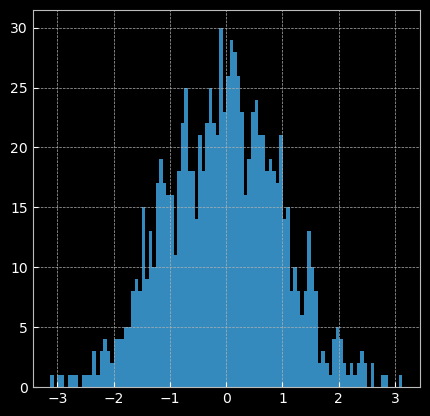

In [115]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

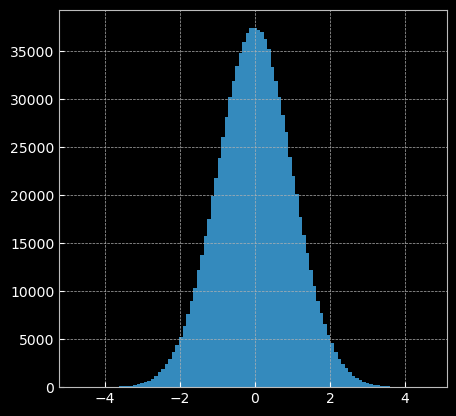

In [118]:
plt.hist(torch.randn(10**6).numpy(), 100);
# use rasterized=True for SVG/EPS/PDF!

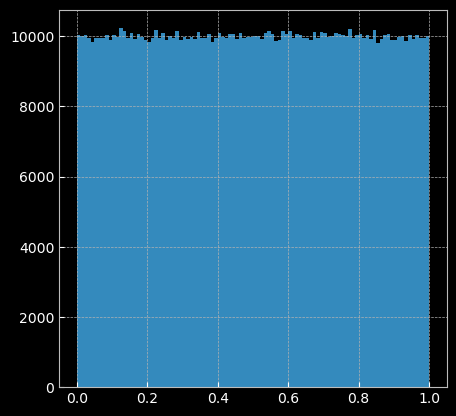

In [119]:
plt.hist(torch.rand(10**6).numpy(), 100);

In [120]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [121]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [122]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4], dtype=torch.int32)
